### Installing libraries

In [ ]:
!pip install pyitlib
!pip install imbalanced-learn
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyitlib: filename=pyitlib-0.2.2-py3-none-any.whl size=28501 sha256=057ba19a02df71a484253b4486e064e921d842028b7dcf9a348de54b572e07c3
  Stored in directory: /root/.cache/pip/wheels/14/96/d6/86e32d66e5bb0440dc344e75849266b2bf2939520672e33e4e
Successfully built pyitlib
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Imports

In [ ]:
import numpy as np
import pandas as pd

# For statistical tests
from scipy import stats

# For visualization
%matplotlib notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# For pandas profiling
from pandas_profiling import ProfileReport

# Show all columns
pd.set_option('display.max_columns', None)

# For text EDA
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.linear_model import LinearRegression, LogisticRegression

# For entropy computation
from pyitlib import discrete_random_variable as drv

# For mapping to Google Drive
from google.colab import drive

from sklearn.model_selection import train_test_split

from imblearn.combine import SMOTEENN

import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Initiate dataframe
df = pd.read_csv('fraud_oracle.csv', index_col=None)

### Description of dataset columns 



*   Month: Month where the accident occurred[Jan, Feb ... Dec]
*   WeekOfMonth: provides the week of the month the accident has occured [1,2,3,4,5]
*   DayOfWeek: ["Monday",...,"Sunday"]
*   Make: Car Manufacturers (19)
*   AccidentArea: ["Urban", "Rural"]
*   DayOfWeekClaimed: the day at which the claim was filed. ["Monday",...,"Sunday"]
*   MonthClaimed: the month at which the claim was filed. [Jan, Feb ... Dec]
*   WeekOfMonthClaimed: the week at which the claim was filed.
*   Sex: ['Female', 'Male']
*   MaritalStatus: ['Single', 'Married' 'Widow', 'Divorced']
*   Age: Continuous 
*   Fault: ['Policy Holder', 'Third Party']
*   Policy Type: ['Sport - Liability', 'Sport - Collision', 'Sedan - Liability',
 'Utility - All Perils', 'Sedan - All Perils', 'Sedan - Collision',
 'Utility - Collision', 'Utility - Liability', 'Sport - All Perils']
*   VehicleCategory: ['Sport' 'Utility' 'Sedan']
*   VehiclePrice: ['more than 69000', '20000 to 29000', '30000 to 39000', 'less than 20000', '40000 to 59000' '60000 to 69000']
*   FraudFound_P: [0,1]
*   PolicyNumber: continuous [1-15420]
*   RepNumber [1-16]
*   Deductible: [300, 400, 500, 700]
*   DriverRating: [1, 2, 3, 4]
*   Days_Policy_Accident: the number of days from when the policy was bought till the day of accident ['none','1 to 7','8 to 15','15 to 30','more than 30']
*   Days_Policy_Claim: ['none','8 to 15','15 to 30','more than 30']
*   PastNumberOfClaims: ['none' '1' '2 to 4' 'more than 4']
*   AgeOfVehicle: ['new','2 years','3 years','4 years','5 years','6 years','7 years','more than 7']
*   AgeOfPolicyHolder: ['16 to 17','18 to 20','21 to 25','26 to 30','31 to 35','36 to 40','41 to 50','51 to 65', 'over 65']
*   PoliceReportFiled: ['No','Yes']
*   WitnessPresent: ['No', 'Yes']
*   AgentType: ['External', 'Internal']
*   NumberOfSuppliments: ['none','1 to 2','3 to 5','more than 5']
*   AddressChange_Claim: ['no change','under 6 months','1 year','2 to 3 years','4 to 8 years']
*   NumberOfCars: ['1 vehicle','2 vehicles','3 to 4','5 to 8','more than 8']
*   Year: [1994, 1995, 1996]
*   BasePolicy: ['Liability', 'Collision', 'All Perils']

### Data cleaning

In [ ]:
# change index to policy number
df = df.set_index('PolicyNumber')

In [ ]:
# Data Cleaning
print('Before data cleaning:')
print()
print(f"Number of rows: {len(df)}")
print(f"Number of columns: {len(df.columns)}")

Before data cleaning:

Number of rows: 15420
Number of columns: 32


In [ ]:
# Check number of null for each
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

**We conducted pandas profiling to do a high-level analysis of the dataset**




In [ ]:
# profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
# profile.to_file("your_report.html")

### Initial EDA

In [ ]:
# Separation into numerical and categorical variables
numerical_variables = ['Age', 'RepNumber']
cat_variables = ['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 
                 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 
                 'VehicleCategory', 'VehiclePrice', 'Deductible', 'DriverRating', 
                 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 
                 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 
                 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy','FraudFound_P']

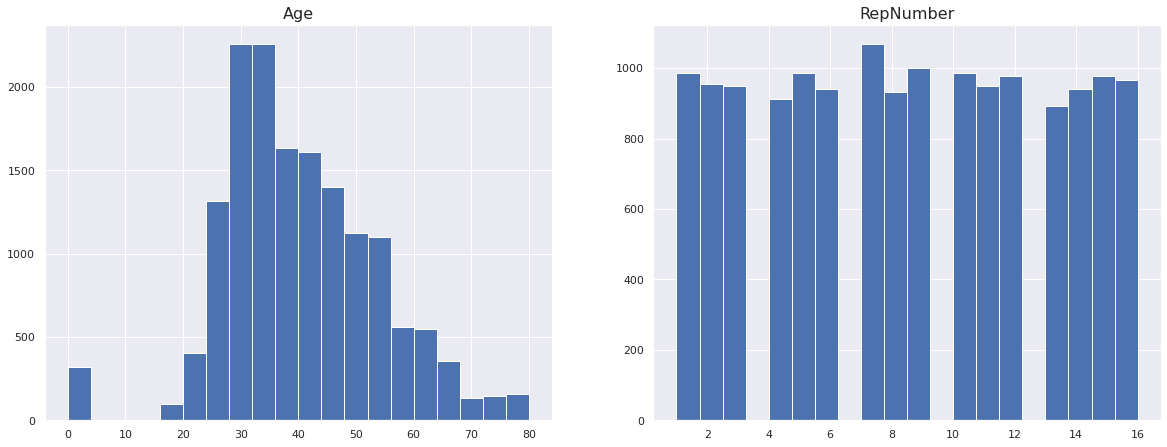

In [ ]:
plt.figure(figsize=(20,16))
plt.subplot(221)

axes = [None] * len(numerical_variables)

for index, name in enumerate(df[numerical_variables].columns):
    axes[index] = plt.subplot(2, 2, index+1, label=str(index))
    df[name].hist(ax=axes[index], bins=20)
    axes[index].set_title(name, fontsize=16)
plt.show()

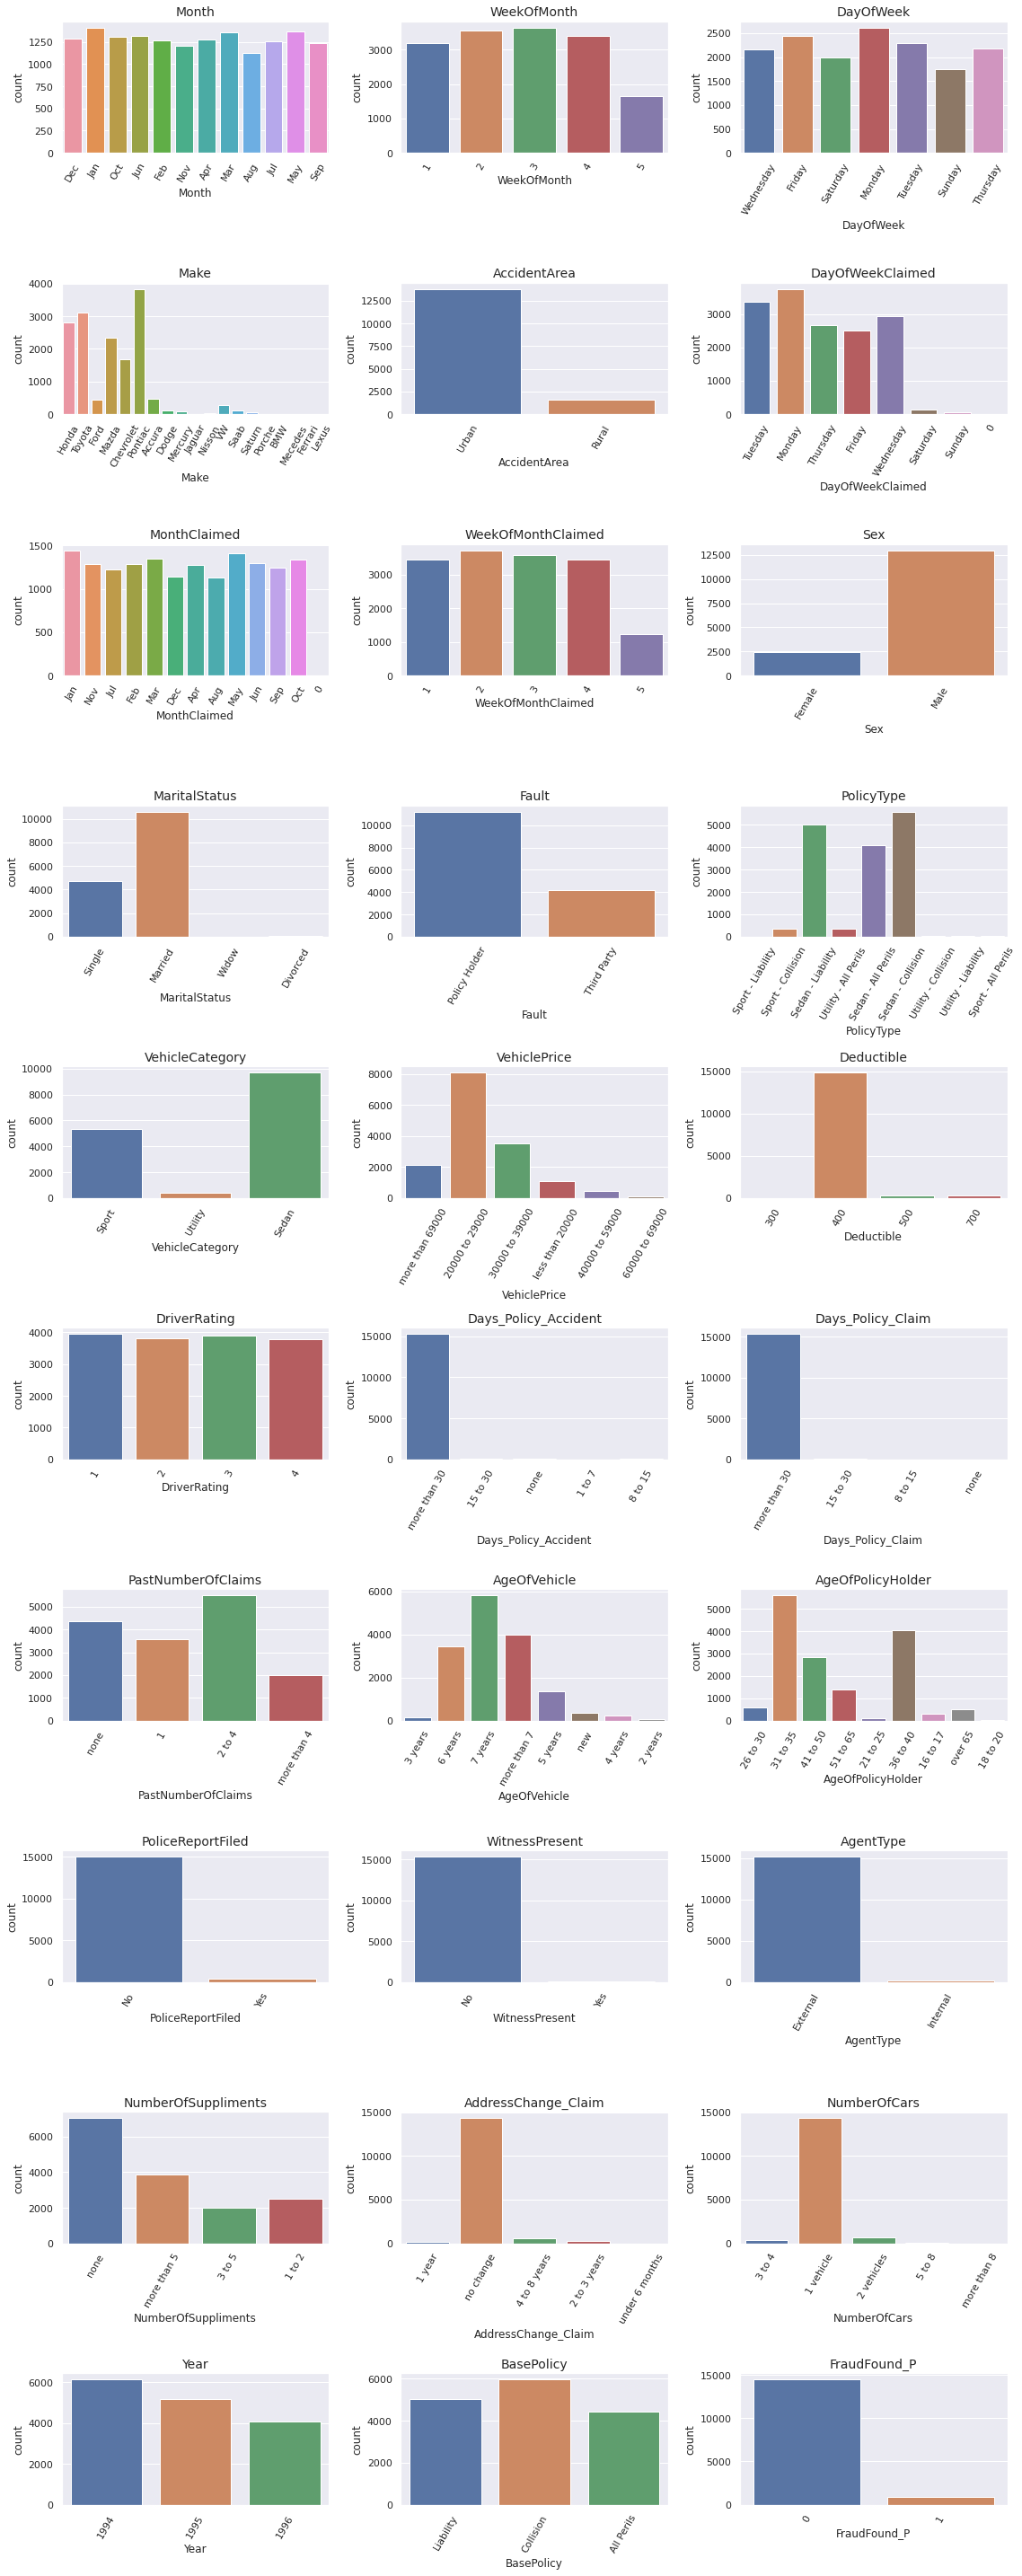

In [ ]:
# Set up the matplotlib figure
f, axes = plt.subplots(10, 3, figsize=(16,40), sharex=False)
# sns.despine(left=True)
axes = [None] * len(cat_variables)

for index, name in enumerate(cat_variables):
    axes[index] = plt.subplot(10, 3, index+1, label=str(index))
    sns.countplot(x=name, data=df, ax=axes[index])
    axes[index].set_title(name, fontsize=14)
    axes[index].set_xticklabels(axes[index].get_xticklabels(), rotation=60)

plt.tight_layout() 

### Dropping redundant data/outliers based on insights gained from pandas profiling 

#### Drop problematic rows

In [ ]:
# from profiling, realised problematic row
df[df['DayOfWeekClaimed'] == '0']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
PolicyNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1517,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,0,Policy Holder,Sedan - All Perils,Sedan,more than 69000,0,15,400,2,more than 30,none,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


In [ ]:
df[df['MonthClaimed'] == '0']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
PolicyNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1517,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,0,Policy Holder,Sedan - All Perils,Sedan,more than 69000,0,15,400,2,more than 30,none,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


In [ ]:
df[df['Days_Policy_Claim'] == 'none']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
PolicyNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1517,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,0,Policy Holder,Sedan - All Perils,Sedan,more than 69000,0,15,400,2,more than 30,none,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


In [ ]:
# As both 'DayOfWeekClaimed' == 0 and 'MonthClaimed' == 0 are the same row, 
# and it is only one out of 12335 rows, we will drop it.
df = df.drop(1516)

#### Age

In [ ]:
len(df[df['Age'] == 0])

320

In [ ]:
agena = df[df['Age'] == 0]

Text(0.5, 1.0, 'Age Zero Distribution')

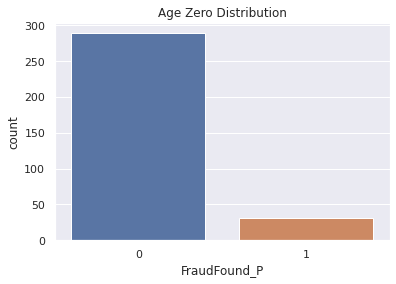

In [ ]:
sns.countplot(x = agena['FraudFound_P']).set_title('Age Zero Distribution')

Text(0.5, 1.0, 'Overall Distribution')

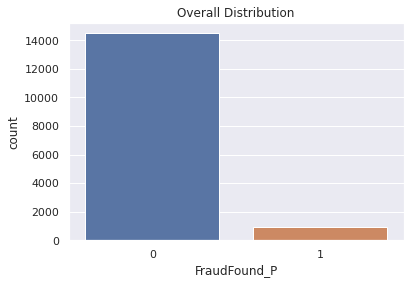

In [ ]:
sns.countplot(x = df['FraudFound_P']).set_title('Overall Distribution')

In [ ]:
# However, as the number of rows with Age = 0 is less than 5% of the total number of rows, we have decided to drop these rows.
df = df.drop(df[df['Age'] == 0].index)

#### PastNumberOfClaims

In [ ]:
df['PastNumberOfClaims'].value_counts()

2 to 4         5378
none           4243
1              3509
more than 4    1969
Name: PastNumberOfClaims, dtype: int64

In [ ]:
df.loc[df["PastNumberOfClaims"] == "none", "PastNumberOfClaims"] = '0'
df['PastNumberOfClaims'].value_counts()

2 to 4         5378
0              4243
1              3509
more than 4    1969
Name: PastNumberOfClaims, dtype: int64

#### Analysis of driver's age vs age of policy holder

In [ ]:
df['AgeOfPolicyHolder'].value_counts()

31 to 35    5593
36 to 40    4043
41 to 50    2828
51 to 65    1392
26 to 30     612
over 65      508
21 to 25     108
18 to 20      15
Name: AgeOfPolicyHolder, dtype: int64

In [ ]:
df.loc[df["AgeOfPolicyHolder"] == "over 65", "AgeOfPolicyHolder"] = '65 to 100'
df['AgeOfPolicyHolder'].value_counts()

31 to 35     5593
36 to 40     4043
41 to 50     2828
51 to 65     1392
26 to 30      612
65 to 100     508
21 to 25      108
18 to 20       15
Name: AgeOfPolicyHolder, dtype: int64

In [ ]:
def is_within_age_range(age, age_policy_holder):
    after_split = age_policy_holder.split(" ")
    lower = int(after_split[0])
    upper = int(after_split[2])
    
    return lower <= age and age <= upper

In [ ]:
df['isWithinAgeRange'] = df[['Age','AgeOfPolicyHolder']].apply(lambda x: is_within_age_range(*x), axis=1)
df['isWithinAgeRange'].value_counts()

True     8178
False    6921
Name: isWithinAgeRange, dtype: int64

#### Analysis of date related variables

In [ ]:
daysInAMonth = {}
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
for year in [1994,1995,1996]:
  daysInAMonth[year] = {}
  for month in months:
    test = df[(df["Year"] == year) & (df["Month"] == month)]
    test["WeekOfMonth"] = test["WeekOfMonth"].astype(str)
    test["WeekDay"] = test["WeekOfMonth"] + " "+ test["DayOfWeek"]
    daysInAMonth[year][month] = len(test["WeekDay"].unique())


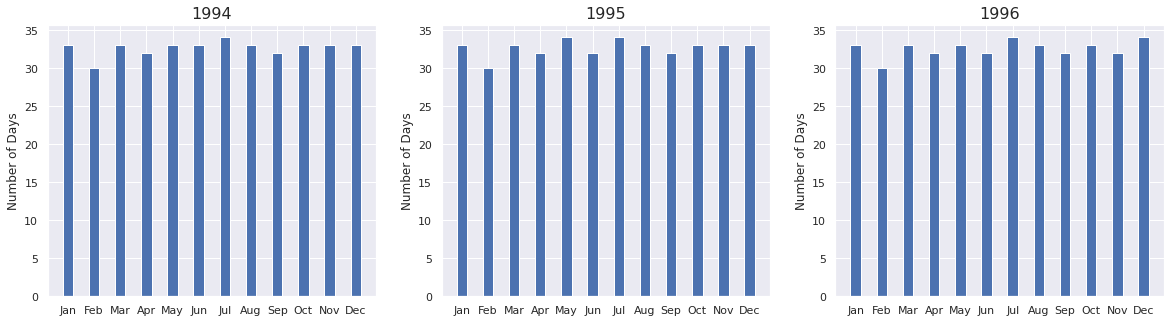

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(131)

axes = [None] * len(daysInAMonth)

for index, year in enumerate(daysInAMonth.keys()):
    axes[index] = plt.subplot(1, 3, index+1, label=str(index))
    plt.bar(list(daysInAMonth[year].keys()), list(daysInAMonth[year].values()), width = 0.4)
    axes[index].set_title(year, fontsize=16)
    axes[index].set_ylabel("Number of Days")

plt.show()
plt.tight_layout() 

#### Drop columns based on previous analysis

In [ ]:
cols_to_drop = [ 'WeekOfMonth', 'DayOfWeek', 'DayOfWeekClaimed', 'WeekOfMonthClaimed', 'RepNumber']
df = df.drop(cols_to_drop, axis=1)
print('After data cleaning:')
print()
print(f"Number of rows: {len(df)}")
print(f"Number of columns: {len(df.columns)}")

After data cleaning:

Number of rows: 15099
Number of columns: 28


### Checking column type

In [ ]:
df.dtypes

Month                   object
Make                    object
AccidentArea            object
MonthClaimed            object
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
FraudFound_P             int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
Year                     int64
BasePolicy              object
isWithinAgeRange          bool
dtype: object

In [ ]:
# Convert FraudFound_P from object to int64
df['FraudFound_P'] = pd.to_numeric(df["FraudFound_P"])

### Train-test split

In [ ]:
# Split df_train, df_test, df_valid into 80:10:10 for train:valid:test dataset
train_size=0.7

# Split and stratify the data into training and remaining dataset
df_train, df_rem = train_test_split(df, train_size=0.7, stratify=df['FraudFound_P'], random_state=0)

# df_valid and df_test to be equal, 10% each.
test_size = 0.5
df_test, df_valid = train_test_split(df_rem, test_size=0.5, stratify=df_rem['FraudFound_P'], random_state=0)

print(df_train.shape)
print(df_test.shape)
print(df_valid.shape)

(10569, 28)
(2265, 28)
(2265, 28)


Checking for imbalanced dataset and tackle it

In [ ]:
# Checking if imbalanced dataset
df_train_0 = df_train[df_train['FraudFound_P'] == "0"]
df_train_1 = df_train[df_train['FraudFound_P'] == "1"]
print(f"Shape of df where there is no Fraud: {df_train_0.shape}")
print(f"Shape of df where there is Fraud: {df_train_1.shape}")

df_test_0 = df_test[df_test['FraudFound_P'] == "0"]
df_test_1 = df_test[df_test['FraudFound_P'] == "1"]
print(f"Shape of df where there is no Fraud: {df_test_0.shape}")
print(f"Shape of df where there is Fraud: {df_test_1.shape}")

Shape of df where there is no Fraud: (0, 28)
Shape of df where there is Fraud: (0, 28)
Shape of df where there is no Fraud: (0, 28)
Shape of df where there is Fraud: (0, 28)


In [ ]:
df

### Feature selection/engineering by detecting multicollinearity

#### Categorical vs categorical

In [ ]:
numeric_variables = ['Age']
cat_variables = ['Month', 'Make', 'AccidentArea', 'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 
                 'VehicleCategory', 'VehiclePrice', 'Deductible', 'DriverRating', 
                 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 
                 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 
                 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy','FraudFound_P']

In [ ]:
#Information gain to test
for cat in cat_variables: #make sure all categorical variables are in string format
    if df_train[cat].dtype != object:
        df_train[cat] = df_train[cat].apply(str)

In [ ]:
# Compute Entropy
entropies = []
for x in cat_variables:
    try:
        entropy = drv.entropy(df_train[x])
        entropies.append((x, entropy))
    except Exception as e:
        print(str(e))
entropies = pd.DataFrame(entropies, columns=['cat1', 'H(cat1)'])

# Compute Conditional Entropy
results = []
for cat1 in cat_variables:
    for cat2 in cat_variables:
        try:
            cond_entropy = drv.entropy_conditional(df_train[cat1], df_train[cat2])
            results.append((cat1,cat2,cond_entropy))
        except Exception as e:
            print(str(e))

In [ ]:
conditional_entropy = pd.DataFrame(results, columns=['cat1', 'cat2', 'H(cat1|cat2)'])

information_gain = entropies.merge(conditional_entropy)
information_gain['information gain'] = information_gain['H(cat1)'] - information_gain['H(cat1|cat2)']

information_gain

,cat1,H(cat1),cat2,H(cat1|cat2),information gain
0,Month,3.5827028016966356,Month,0.0,3.582703
1,Month,3.5827028016966356,Make,3.5713533747687074,0.011349
2,Month,3.5827028016966356,AccidentArea,3.5823191200291853,0.000384
3,Month,3.5827028016966356,MonthClaimed,1.0824992155518318,2.500204
4,Month,3.5827028016966356,Sex,3.5812631102187606,0.00144
...,...,...,...,...,...
671,FraudFound_P,0.3236245896970126,AddressChange_Claim,0.3212238116124287,0.002401
672,FraudFound_P,0.3236245896970126,NumberOfCars,0.3235979351335624,0.000027
673,FraudFound_P,0.3236245896970126,Year,0.3233935356953679,0.000231
674,FraudFound_P,0.3236245896970126,BasePolicy,0.30041873887592696,0.023206


In [ ]:
igtable = information_gain.pivot_table(values='information gain', index='cat1', columns='cat2', aggfunc=np.sum)
igtable

cat2,AccidentArea,AddressChange_Claim,AgeOfPolicyHolder,AgeOfVehicle,AgentType,BasePolicy,Days_Policy_Accident,Days_Policy_Claim,Deductible,DriverRating,Fault,FraudFound_P,Make,MaritalStatus,Month,MonthClaimed,NumberOfCars,NumberOfSuppliments,PastNumberOfClaims,PoliceReportFiled,PolicyType,Sex,VehicleCategory,VehiclePrice,WitnessPresent,Year
cat1,,,,,,,,,,,,,,,,,,,,,,,,,,
AccidentArea,0.474401,0.000835,0.000390,0.000194,3.392397e-05,0.002391,0.000145,0.000027,0.000100,0.000158,1.735172e-05,0.000869,0.001954,0.000241,0.000384,0.000433,0.000274,0.000595,0.002292,0.000036,0.003475,5.459299e-04,0.003094,0.000540,4.304521e-04,0.000010
AddressChange_Claim,0.000835,0.474689,0.001725,0.002782,1.052280e-03,0.000459,0.000897,0.000373,0.112281,0.000837,2.448315e-04,0.002401,0.003623,0.000908,0.002209,0.002894,0.253002,0.000186,0.001081,0.000818,0.001241,9.280898e-05,0.000124,0.000930,2.600280e-04,0.000417
AgeOfPolicyHolder,0.000390,0.001725,2.217283,0.610469,2.561434e-04,0.018070,0.001705,0.000711,0.008022,0.001677,1.601677e-03,0.000696,0.020542,0.177849,0.005164,0.005750,0.001175,0.003720,0.002964,0.000304,0.031153,1.277134e-02,0.009075,0.024319,5.904154e-04,0.001432
AgeOfVehicle,0.000194,0.002782,0.610469,2.059248,6.185676e-04,0.012024,0.002818,0.000831,0.018625,0.000934,5.353838e-04,0.000714,0.031079,0.130693,0.007893,0.008092,0.000884,0.014334,0.004188,0.000632,0.022484,3.027461e-02,0.007057,0.039972,1.067952e-03,0.000839
AgentType,0.000034,0.001052,0.000256,0.000619,1.182915e-01,0.008103,0.000270,0.000126,0.000035,0.000109,4.508285e-07,0.000487,0.001922,0.000344,0.001027,0.001306,0.001280,0.001029,0.000781,0.000305,0.009376,3.506505e-04,0.001366,0.006873,5.548082e-05,0.000266
BasePolicy,0.002391,0.000459,0.018070,0.012024,8.103010e-03,1.573176,0.001556,0.000476,0.000820,0.000400,3.506010e-02,0.023206,0.022451,0.003014,0.002362,0.002953,0.000221,0.002098,0.101950,0.001058,1.573176,4.147867e-03,0.809906,0.054064,1.487087e-03,0.000455
Days_Policy_Accident,0.000145,0.000897,0.001705,0.002818,2.700151e-04,0.001556,0.112538,0.034861,0.000318,0.000659,7.916053e-04,0.000393,0.004003,0.000918,0.002954,0.002637,0.001414,0.008468,0.002934,0.000340,0.002275,2.893149e-04,0.001388,0.002090,7.891497e-04,0.000839
Days_Policy_Claim,0.000027,0.000373,0.000711,0.000831,1.257613e-04,0.000476,0.034861,0.053136,0.000190,0.000419,5.304940e-04,0.000126,0.001696,0.000412,0.001662,0.000899,0.000331,0.004227,0.001434,0.000191,0.000801,8.592837e-05,0.000562,0.001542,4.590156e-05,0.000094
Deductible,0.000100,0.112281,0.008022,0.018625,3.493969e-05,0.000820,0.000318,0.000190,0.278393,0.000408,1.708405e-04,0.002340,0.002993,0.001001,0.002407,0.002350,0.001752,0.000937,0.000590,0.000024,0.001283,3.273394e-04,0.000687,0.001035,1.022240e-05,0.000369


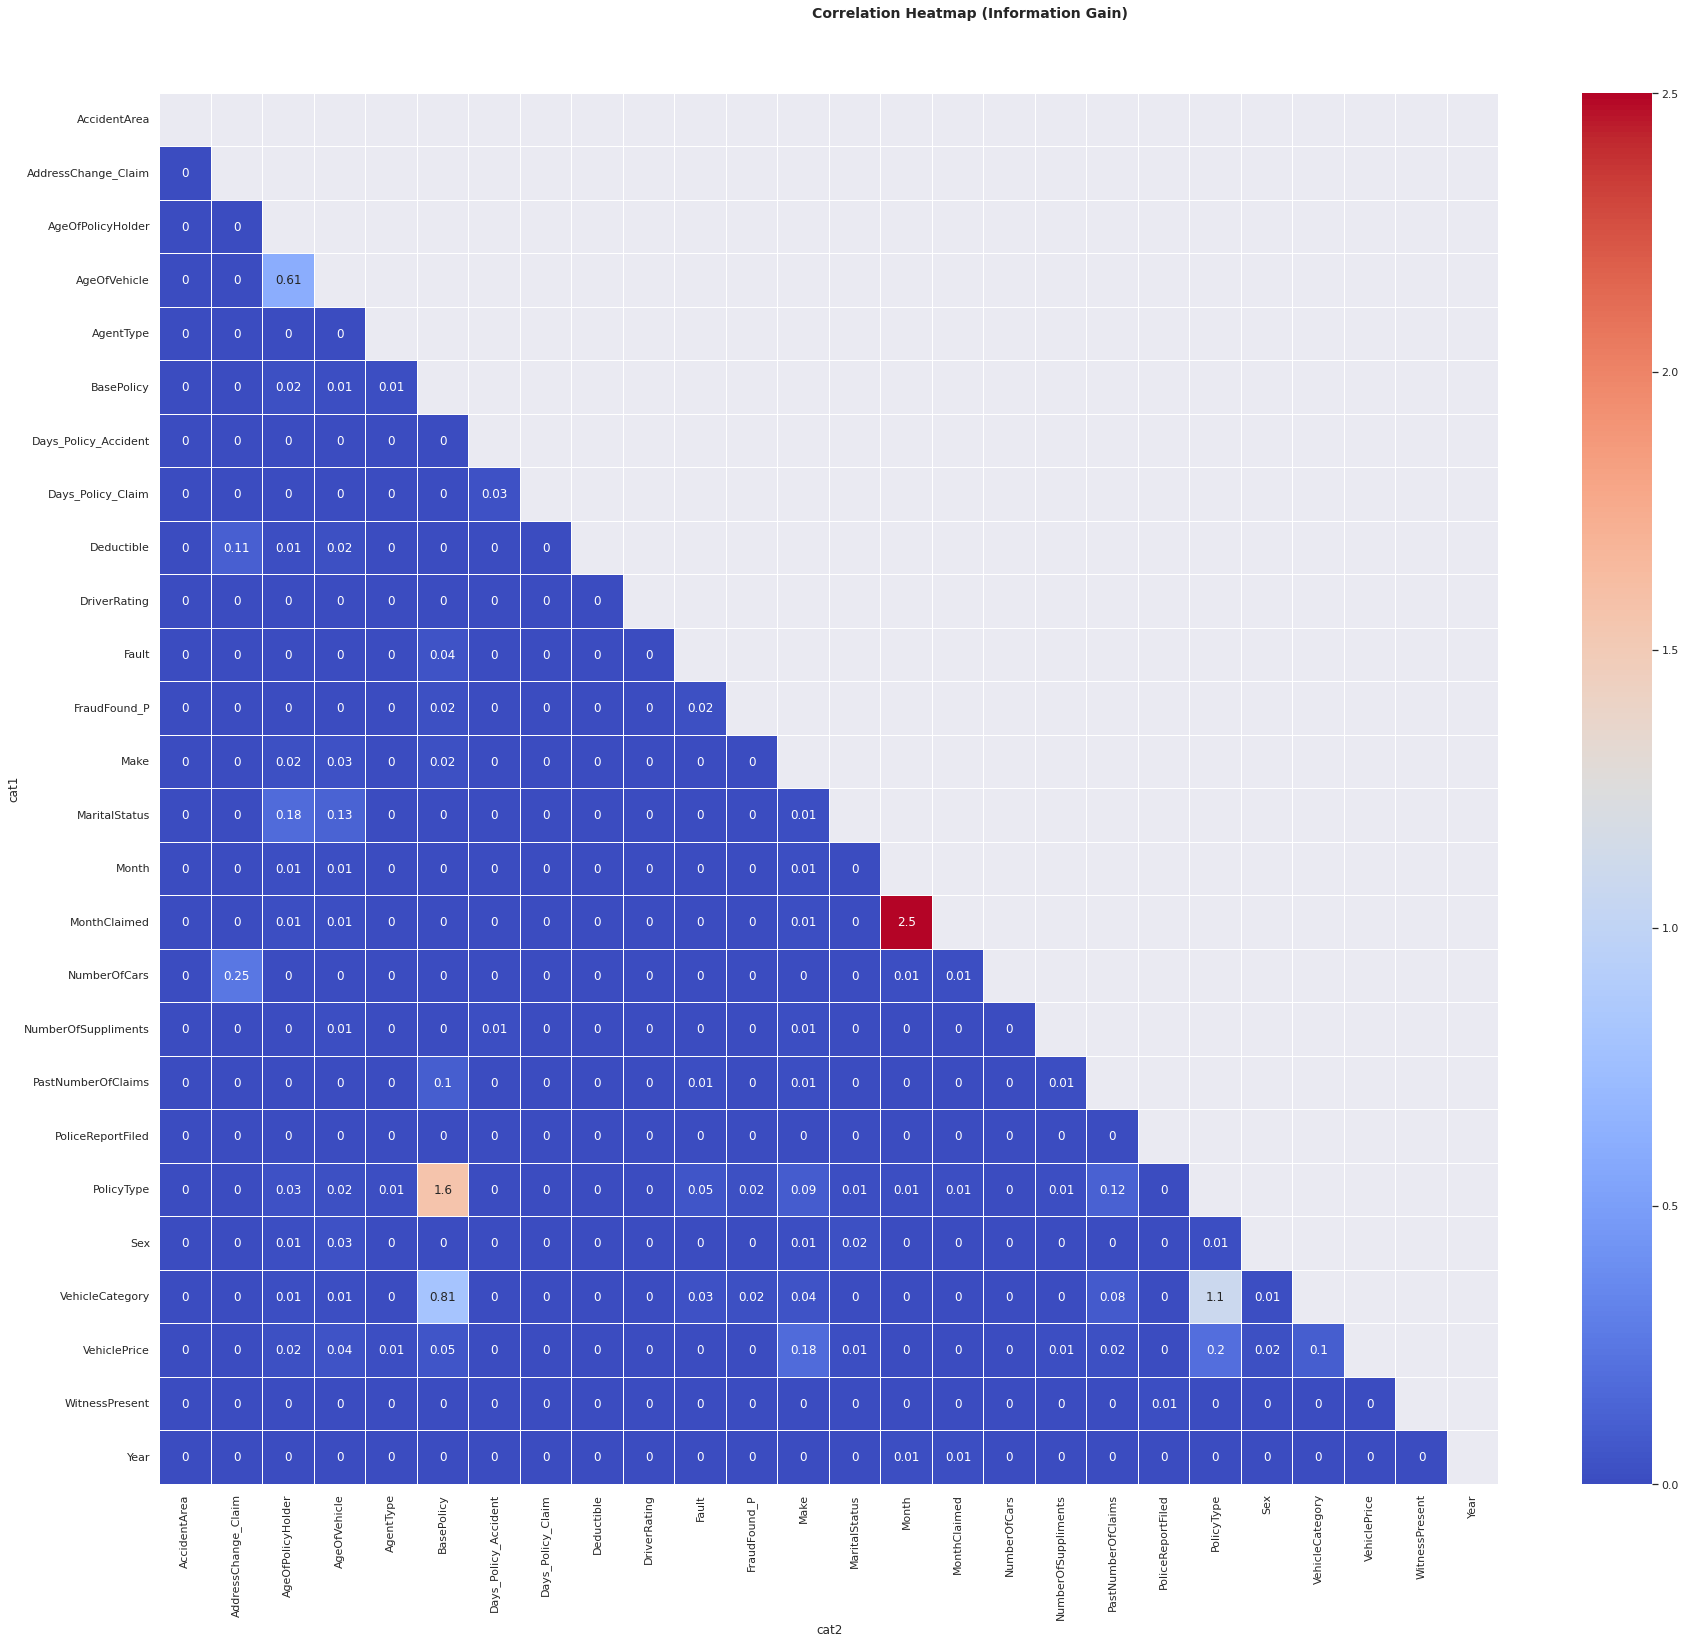

In [ ]:
mask = np.zeros_like(igtable)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(1,1, figsize=(30,24))

hm = sns.heatmap(round(igtable,2), 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 mask = mask,
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)

t = fig.suptitle('Correlation Heatmap (Information Gain)', fontsize=14, fontweight='bold')
plt.show()

From this heatmap, we can observe that 'Month' and 'MonthClaimed'has very high information gain of 2.5. This is because in most cases, the month when the accident happened is the same as the month when the insurance claim was submitted. Hence, in order to avoid multicollinearity, we choose to drop the 'Month' column.

We also observe that 'PolicyType', 'BasePolicy' and 'VehicleCategory' are highly correlated with each other as shown by the high information gain. This is because 'PoliceType' is a combination of 'VehicleCategory' and 'BasePolicy'. Hence we choose to drop both the 'VehicleCategory' and 'BasePolicy' columns.


The result from Chi Square test aligns with the information gain test

In [ ]:
#Cat vs cat variables, Chi Square test
p_values = []
chai_stats = []
for cat1 in cat_variables:
    for cat2 in cat_variables:
            crosstab = pd.crosstab(df_train[cat1], df_train[cat2])
            chai2, p_val, _, _ = stats.chi2_contingency(crosstab)
            p_values.append((cat1, cat2, p_val))
            chai_stats.append((cat1, cat2, chai2))
     

chisquare = pd.DataFrame(p_values, columns=['cat1', 'cat2', 'p-value'])
chitable = chisquare.pivot_table(index='cat1', columns='cat2', values='p-value')
chitable

cat2,AccidentArea,AddressChange_Claim,AgeOfPolicyHolder,AgeOfVehicle,AgentType,BasePolicy,Days_Policy_Accident,Days_Policy_Claim,Deductible,DriverRating,Fault,FraudFound_P,Make,MaritalStatus,Month,MonthClaimed,NumberOfCars,NumberOfSuppliments,PastNumberOfClaims,PoliceReportFiled,PolicyType,Sex,VehicleCategory,VehiclePrice,WitnessPresent,Year
cat1,,,,,,,,,,,,,,,,,,,,,,,,,,
AccidentArea,0.000000e+00,5.987856e-03,9.728638e-01,8.474761e-01,5.299643e-01,2.596149e-11,4.319854e-01,7.047620e-01,7.391589e-01,0.976995,4.624993e-01,8.213540e-06,3.153823e-06,4.952028e-01,3.129802e-01,1.398125e-01,3.964488e-01,2.958344e-02,3.579383e-11,6.946730e-01,8.846832e-14,7.326526e-05,7.253154e-15,9.897771e-02,4.397549e-04,7.780740e-01
AddressChange_Claim,5.987856e-03,0.000000e+00,4.971706e-01,8.263216e-02,2.488541e-02,3.327491e-01,1.599672e-01,6.206766e-01,0.000000e+00,0.776106,6.416111e-01,7.155652e-22,7.873673e-01,7.740049e-01,3.619748e-01,3.406883e-01,0.000000e+00,8.702084e-01,1.075230e-01,7.577173e-02,4.459587e-10,8.048683e-01,7.441681e-01,7.335653e-01,5.983500e-01,6.268037e-01
AgeOfPolicyHolder,9.728638e-01,4.971706e-01,0.000000e+00,0.000000e+00,7.938113e-01,1.785309e-68,1.209692e-02,2.147978e-02,4.129768e-18,0.468456,1.900372e-03,6.589171e-04,6.386243e-41,0.000000e+00,5.666212e-01,2.608093e-01,9.578259e-01,9.252383e-06,2.651740e-06,4.651331e-01,1.384533e-232,6.765354e-45,2.906822e-29,3.219210e-91,1.403256e-01,7.870249e-02
AgeOfVehicle,8.474761e-01,8.263216e-02,0.000000e+00,0.000000e+00,4.826979e-01,1.074973e-46,1.783570e-09,3.835070e-03,5.203078e-48,0.948604,3.797512e-01,7.253337e-03,1.200875e-81,0.000000e+00,5.383432e-06,1.093753e-03,9.978688e-01,2.036005e-40,8.758547e-09,3.105490e-01,2.755273e-103,2.232198e-132,5.626975e-22,1.324681e-174,7.596227e-03,6.844403e-01
AgentType,5.299643e-01,2.488541e-02,7.938113e-01,4.826979e-01,0.000000e+00,7.978436e-24,7.210947e-01,5.352439e-01,8.833406e-01,0.717408,6.030682e-01,7.559942e-03,1.620940e-02,1.265778e-01,1.655234e-01,3.252380e-02,8.484011e-03,1.251513e-03,1.166810e-02,6.736443e-03,2.115295e-29,1.123459e-01,2.559588e-07,3.401176e-29,3.176973e-01,6.785862e-02
BasePolicy,2.596149e-11,3.327491e-01,1.785309e-68,1.074973e-46,7.978436e-24,0.000000e+00,1.315881e-03,2.248051e-02,1.339014e-01,0.390819,1.592535e-141,1.089630e-82,2.309191e-76,3.725342e-10,1.000121e-02,4.869284e-04,9.067608e-01,3.592842e-08,0.000000e+00,4.431094e-07,0.000000e+00,1.270478e-17,0.000000e+00,3.964733e-275,1.256951e-05,7.132808e-02
Days_Policy_Accident,4.319854e-01,1.599672e-01,1.209692e-02,1.783570e-09,7.210947e-01,1.315881e-03,0.000000e+00,0.000000e+00,9.835192e-01,0.536222,1.780024e-03,1.783846e-02,4.169850e-02,3.774208e-03,6.303784e-01,4.548881e-01,3.725623e-26,3.255631e-27,4.790348e-07,6.512007e-02,3.649276e-02,4.274177e-01,1.775138e-02,2.605529e-02,5.096858e-10,3.616689e-01
Days_Policy_Claim,7.047620e-01,6.206766e-01,2.147978e-02,3.835070e-03,5.352439e-01,2.248051e-02,0.000000e+00,0.000000e+00,9.894518e-01,0.569297,2.820178e-02,8.196165e-02,6.300039e-02,1.048420e-01,2.480541e-01,8.563266e-01,4.416385e-01,1.223058e-13,2.732235e-06,1.533492e-01,3.722970e-01,3.154539e-01,2.804952e-01,1.310419e-01,4.452057e-01,6.504471e-01
Deductible,7.391589e-01,0.000000e+00,4.129768e-18,5.203078e-48,8.833406e-01,1.339014e-01,9.835192e-01,9.894518e-01,0.000000e+00,0.791276,7.930461e-01,2.814435e-16,4.494853e-01,2.732982e-02,4.193254e-01,7.833718e-01,8.842668e-09,7.980638e-02,5.635561e-01,6.624058e-01,0.000000e+00,3.528399e-02,1.787614e-01,7.148415e-01,9.720814e-01,9.927891e-01


#### Drop multicollinear columns

In [ ]:
# Drop 'Month','BasePolicy','VehicleCategory'
cols_drop = ['Month','BasePolicy','VehicleCategory']
df_train = df_train.drop(cols_drop, axis = 1)
df_test = df_test.drop(cols_drop, axis = 1)
df_valid = df_valid.drop(cols_drop, axis = 1)

#### Categorical vs numerical

In [ ]:
### anova
# Anova test
numerical_variables = ['Age']
cat_variables = [ 'Make', 'AccidentArea', 
                 'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 
                  'VehiclePrice', 'FraudFound_P', 'Deductible', 'DriverRating', 
                 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 
                 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 
                 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year']

results = []

for cat in cat_variables:
    for num in numerical_variables:
        
        candidates = []
        for val in df[cat].unique():
            if len(df[df[cat]==val][num])>0:
                candidates.append(df[df[cat]==val][num])
                
        _, p_val = stats.f_oneway(*candidates)
        results.append((cat, num, p_val))

Anova = pd.DataFrame(results, columns=['Numerical', 'Categorical', 'P-value'])
Anova.pivot_table(index='Numerical', columns='Categorical').head()

# if less than 0.05, statistically significant, ceteris paribus

,P-value
Categorical,Age
Numerical,
AccidentArea,0.595749
AddressChange_Claim,0.579455
AgeOfPolicyHolder,0.000000
AgeOfVehicle,0.000000
AgentType,0.364931


### Encoding categorical data

Converting variables with 2 values into 1 and 0

In [ ]:
list(df.nunique()[df.nunique() == 2].index)

['AccidentArea',
 'Sex',
 'Fault',
 'FraudFound_P',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'isWithinAgeRange']

In [ ]:
def convert_binary_and_delete(df, col_name, value_1_name, value_0_name):
    new_col_name = col_name + "_Is" + str(value_1_name).capitalize().replace(" ","")
    df[new_col_name] = df[col_name].apply({value_1_name:1, value_0_name:0}.get)
    df.drop(col_name, axis=1, inplace=True)
    return df

In [ ]:
for i in [df_train, df_valid, df_test]:
  i = convert_binary_and_delete(i, 'AccidentArea', 'Urban', 'Rural')
  i = convert_binary_and_delete(i, 'Sex', 'Male', 'Female')
  i = convert_binary_and_delete(i, 'Fault', 'Policy Holder', 'Third Party')
  i = convert_binary_and_delete(i, 'PoliceReportFiled', 'Yes', 'No')
  i = convert_binary_and_delete(i, 'WitnessPresent', 'Yes', 'No')
  i = convert_binary_and_delete(i, 'AgentType', 'External', 'Internal')
  i = convert_binary_and_delete(i, 'isWithinAgeRange', True, False)


Encoding Ordinal features

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
for df in [df_train, df_test, df_valid]:
  enc = OrdinalEncoder(categories=[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])
  df[["MonthClaimed"]] = enc.fit_transform(df[["MonthClaimed"]])

  enc = OrdinalEncoder(categories=[['none','1 to 7','8 to 15','15 to 30','more than 30']])
  df[["Days_Policy_Accident"]] = enc.fit_transform(df[["Days_Policy_Accident"]])

  enc = OrdinalEncoder()
  df[["DriverRating"]] = enc.fit_transform(df[["DriverRating"]])

  enc = OrdinalEncoder()
  df[["Deductible"]] = enc.fit_transform(df[["Deductible"]])

  enc = OrdinalEncoder(categories=[['0','1','2 to 4','more than 4']])
  df[["PastNumberOfClaims"]] = enc.fit_transform(df[["PastNumberOfClaims"]])

  enc = OrdinalEncoder(categories=[['new','2 years','3 years','4 years', '5 years', '6 years', '7 years', 'more than 7']])
  df[["AgeOfVehicle"]] = enc.fit_transform(df[["AgeOfVehicle"]])

  enc = OrdinalEncoder(categories=[['8 to 15','15 to 30','more than 30']])
  df[["Days_Policy_Claim"]] = enc.fit_transform(df[["Days_Policy_Claim"]])

  enc = OrdinalEncoder(categories=[['1 vehicle','2 vehicles','3 to 4','5 to 8','more than 8']])
  df[["NumberOfCars"]] = enc.fit_transform(df[["NumberOfCars"]])

  enc = OrdinalEncoder(categories=[['less than 20000','20000 to 29000','30000 to 39000','40000 to 59000','60000 to 69000','more than 69000']])
  df[["VehiclePrice"]] = enc.fit_transform(df[["VehiclePrice"]])

  enc = OrdinalEncoder(categories=[['18 to 20','21 to 25','26 to 30','31 to 35','36 to 40','41 to 50','51 to 65','65 to 100']])
  df[["AgeOfPolicyHolder"]] = enc.fit_transform(df[["AgeOfPolicyHolder"]])

  enc = OrdinalEncoder(categories=[['none','1 to 2','3 to 5','more than 5']])
  df[["NumberOfSuppliments"]] = enc.fit_transform(df[["NumberOfSuppliments"]])

  enc = OrdinalEncoder(categories=[['no change','under 6 months','1 year','2 to 3 years', '4 to 8 years']])
  df[["AddressChange_Claim"]] = enc.fit_transform(df[["AddressChange_Claim"]])

  enc = OrdinalEncoder(categories = [['1994', '1995', '1996']])
  df[['Year']] = enc.fit_transform(df[["Year"]])

Encoding Nominal Features

In [ ]:
def encode_and_bind(df, feature_to_encode):
    dummies = pd.get_dummies(df[[feature_to_encode]])
    new_df = pd.concat([df, dummies], axis=1)
    new_df = new_df.drop([feature_to_encode], axis=1)
    return new_df 

In [ ]:
nominal_features = ['Make', 'MaritalStatus', 'PolicyType']
ordinal_features = ['Days_Policy_Accident', 'DriverRating', 'Deductible',
                    'PastNumberOfClaims', 'AgeOfVehicle', 'Days_Policy_Claim', 
                    'NumberOfCars', 'VehiclePrice', 'AgeOfPolicyHolder', 
                    'NumberOfSuppliments', 'AddressChange_Claim']


for feature in nominal_features:
    df_train = encode_and_bind(df_train, feature)
    df_valid = encode_and_bind(df_valid, feature)
    df_test = encode_and_bind(df_test, feature)

print(f"After one-hot-encoding, the shape: {res.shape}")


After one-hot-encoding, the shape: (2265, 52)


In [ ]:
for i in df_train.columns:
  if i not in df_valid.columns:
    df_valid[i] = 0
for i in df_valid.columns:
  if i not in df_train.columns:
    df_train[i] = 0

for i in df_train.columns:
  if i not in df_test.columns:
    df_test[i] = 0
for i in df_test.columns:
  if i not in df_train.columns:
    df_test[i] = 0

for i in df_valid.columns:
  if i not in df_test.columns:
    df_valid[i] = 0
for i in df_test.columns:
  if i not in df_valid.columns:
    df_test[i] = 0

In [ ]:
print(df_train.shape)
print(df_valid.shape)
print(df_test.shape)

(10569, 54)
(2265, 54)
(2265, 54)


In [ ]:
df_train['Age']

PolicyNumber
3720     46
10322    34
811      31
3655     30
3067     36
         ..
4644     35
571      45
12952    34
10448    43
5997     47
Name: Age, Length: 10569, dtype: int64

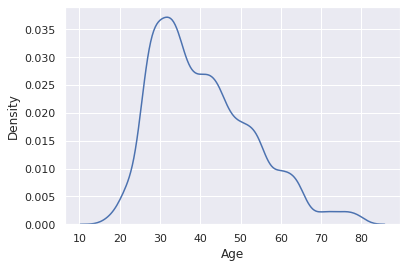

In [ ]:
#### Standardisation of Age
# Check if Age is normally distributed
sns.kdeplot(df_train['Age'])

# As Age appears relatively normally distributed, 
# we will conduct normalisation to make 'Age' to be a similar scale as the other features.


In [ ]:
from sklearn import preprocessing

# We fit via the df_train to prevent data leakage
scaler = preprocessing.StandardScaler()
scaler.fit(df_train[['Age']])

df_train["Normalised_Age"] = scaler.transform(df_train[['Age']])
df_train.drop('Age', axis=1, inplace=True)

df_test["Normalised_Age"] = scaler.transform(df_test[['Age']])
df_test.drop('Age', axis=1, inplace=True)

df_valid["Normalised_Age"] = scaler.transform(df_valid[['Age']])
df_valid.drop('Age', axis=1, inplace=True)

In [ ]:
df_train

,MonthClaimed,VehiclePrice,FraudFound_P,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,AccidentArea_IsUrban,Sex_IsMale,Fault_IsPolicyholder,PoliceReportFiled_IsYes,WitnessPresent_IsYes,AgentType_IsExternal,isWithinAgeRange_IsTrue,Make_Accura,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,Make_Mecedes,Make_Mercury,Make_Nisson,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,PolicyType_Sedan - All Perils,PolicyType_Sedan - Collision,PolicyType_Sedan - Liability,PolicyType_Sport - All Perils,PolicyType_Sport - Collision,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,Make_Ferrari,PolicyType_Sport - Liability,Normalised_Age
PolicyNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3720,2.0,1.0,0,1.0,1.0,4.0,2.0,0.0,6.0,5.0,3.0,0.0,0.0,0.0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.427219
10322,5.0,1.0,0,1.0,1.0,4.0,2.0,3.0,5.0,3.0,3.0,0.0,0.0,1.0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,-0.546320
811,4.0,1.0,0,1.0,0.0,4.0,2.0,2.0,6.0,3.0,0.0,0.0,0.0,0.0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,-0.789705
3655,0.0,5.0,0,1.0,0.0,4.0,2.0,2.0,4.0,3.0,1.0,4.0,1.0,0.0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,-0.870833
3067,3.0,2.0,0,1.0,0.0,4.0,2.0,3.0,6.0,4.0,3.0,4.0,1.0,0.0,1,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,-0.384064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4644,1.0,1.0,0,1.0,3.0,4.0,2.0,2.0,5.0,3.0,3.0,0.0,0.0,0.0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,-0.465192
571,2.0,1.0,0,1.0,3.0,4.0,2.0,1.0,4.0,4.0,2.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.346090
12952,4.0,1.0,0,1.0,1.0,4.0,2.0,2.0,5.0,3.0,0.0,0.0,0.0,2.0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,-0.546320


In [ ]:
df_train.to_csv('gdrive/My Drive/BT4012 Group 20/train_final.csv', index = False)
df_valid.to_csv('gdrive/My Drive/BT4012 Group 20/valid_final.csv', index = False)
df_test.to_csv('gdrive/My Drive/BT4012 Group 20/test_final.csv',index = False)

#### Using combination of over-and under-sampling using SMOTE and Edited Nearest Naighbours such that it is 5:3 Ratio

In [ ]:
X_train = df_train.drop('FraudFound_P', axis=1).values
y_train = df_train['FraudFound_P'].values

In [ ]:
from collections import Counter
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0, sampling_strategy=0.6)

X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

print(sorted(Counter(y_train_resampled).items()))

[(0, 6346), (1, 5938)]


In [ ]:
X_test = df_test.drop('FraudFound_P', axis=1).values
y_test = df_test['FraudFound_P'].values

### Model training + evaluation

In [ ]:
# (Tung Yuen) logistic + ridge regression 

# (Yuan Ren) xgboost


# (Marvin) random forest

# (Zi Yuan) decision trees + ada boost

# (Yi Chen) k modes 

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train_resampled, y_train_resampled)

predictions = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", round(metrics.accuracy_score(y_test, predictions) * 100,2), "%")
print("Recall:", round(metrics.recall_score(y_test,predictions) * 100,2), "%")
print("ROC AUC:", round(metrics.roc_auc_score(y_test,predictions) * 100,2), "%")
print("Precision:", round(metrics.precision_score(y_test,predictions) * 100,2), "%")
print("F1 score:", round(metrics.f1_score(y_test,predictions) * 100,2), "%")

Accuracy: 92.76 %
Recall: 8.96 %
ROC AUC: 53.49 %
Precision: 22.22 %
F1 score: 12.77 %


In [ ]:
feature_list = list(df_train.drop('FraudFound_P', axis=1).columns)
# SHAP USE
feature_imp = pd.Series(clf.feature_importances_,index=feature_list).sort_values(ascending=False)
feature_imp = round(feature_imp,3)
feature_imp

Fault_IsPolicyholder               0.117
PolicyType_Sedan - Liability       0.112
PolicyType_Sedan - All Perils      0.092
PastNumberOfClaims                 0.061
PolicyType_Sedan - Collision       0.057
MonthClaimed                       0.050
Age                                0.043
Make_Pontiac                       0.042
Year                               0.040
VehiclePrice                       0.037
DriverRating                       0.035
Make_Mazda                         0.030
AgeOfVehicle                       0.029
Make_Toyota                        0.027
Make_Honda                         0.026
Sex_IsMale                         0.025
NumberOfSuppliments                0.025
AgeOfPolicyHolder                  0.019
MaritalStatus_Single               0.016
AccidentArea_IsUrban               0.016
Make_Chevrolet                     0.015
MaritalStatus_Married              0.014
isWithinAgeRange_IsTrue            0.010
Make_Accura                        0.009
Deductible      

In [ ]:
# Remove all with importance of less than 0.01
new_RF_df_train = df_train.drop([
    'isWithinAgeRange_IsTrue', 'Make_Accura', 'Deductible',
       'AddressChange_Claim', 'NumberOfCars', 'Make_Ford',
       'PolicyType_Sport - Collision', 'PolicyType_Utility - All Perils',
       'Make_VW', 'PoliceReportFiled_IsYes', 'Make_Saab',
       'Days_Policy_Accident', 'Make_Mercury', 'AgentType_IsExternal',
       'Days_Policy_Claim', 'Make_Saturn', 'MaritalStatus_Divorced',
       'MaritalStatus_Widow', 'Make_Dodge', 'PolicyType_Utility - Collision',
       'WitnessPresent_IsYes', 'Make_Nisson', 'Make_BMW',
       'PolicyType_Utility - Liability', 'Make_Mecedes',
       'PolicyType_Sport - All Perils', 'Make_Porche', 'Make_Jaguar',
       'Make_Lexus', 'PolicyType_Sport - Liability', 'Make_Ferrari'], axis=1)

new_RF_X_train = new_RF_df_train.drop('FraudFound_P', axis=1).values
new_RF_y_train = new_RF_df_train['FraudFound_P'].values

new_RF_df_test = df_test.drop([
    'isWithinAgeRange_IsTrue', 'Make_Accura', 'Deductible',
       'AddressChange_Claim', 'NumberOfCars', 'Make_Ford',
       'PolicyType_Sport - Collision', 'PolicyType_Utility - All Perils',
       'Make_VW', 'PoliceReportFiled_IsYes', 'Make_Saab',
       'Days_Policy_Accident', 'Make_Mercury', 'AgentType_IsExternal',
       'Days_Policy_Claim', 'Make_Saturn', 'MaritalStatus_Divorced',
       'MaritalStatus_Widow', 'Make_Dodge', 'PolicyType_Utility - Collision',
       'WitnessPresent_IsYes', 'Make_Nisson', 'Make_BMW',
       'PolicyType_Utility - Liability', 'Make_Mecedes',
       'PolicyType_Sport - All Perils', 'Make_Porche', 'Make_Jaguar',
       'Make_Lexus', 'PolicyType_Sport - Liability', 'Make_Ferrari'], axis=1)


new_RF_X_test = new_RF_df_test.drop('FraudFound_P', axis=1).values
new_RF_y_test = new_RF_df_test['FraudFound_P'].values

In [ ]:
new_RF_X_train_resampled, new_RF_y_train_resampled = smote_enn.fit_resample(new_RF_X_train, new_RF_y_train)

In [ ]:
new_clf = RandomForestClassifier(n_estimators=100, random_state=0)
new_clf.fit(new_RF_X_train_resampled, new_RF_y_train_resampled)

new_pred = new_clf.predict(new_RF_X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", round(metrics.accuracy_score(new_RF_y_test, new_pred) * 100,2), "%")
print("Recall:", round(metrics.recall_score(new_RF_y_test,new_pred) * 100,2), "%")
print("ROC AUC:", round(metrics.roc_auc_score(new_RF_y_test,new_pred) * 100,2), "%")
print("Precision:", round(metrics.precision_score(new_RF_y_test,new_pred) * 100,2), "%")
print("F1 score:", round(metrics.f1_score(new_RF_y_test,new_pred) * 100,2), "%")

Accuracy: 92.72 %
Recall: 11.94 %
ROC AUC: 54.87 %
Precision: 25.4 %
F1 score: 16.24 %


After removing the less importance features, the new model has a higher accuracy of 94.13% from 92.26%. However, the recall rate is a significantly lower. Hence, the first model is preferred.

#### Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train_resampled,y_train_resampled)

LogisticRegression()

In [ ]:
log_predictions = logmodel.predict(X_test)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,log_predictions))
print(metrics.confusion_matrix(y_test,log_predictions))
print('')
print('Precision: ', metrics.precision_score(y_test,log_predictions).round(2))
print('Recall: ', metrics.recall_score(y_test,log_predictions).round(2))
print('R2: ', metrics.r2_score(y_test,log_predictions).round(2))

              precision    recall  f1-score   support

           0       0.99      0.62      0.76      2131
           1       0.13      0.89      0.22       134

    accuracy                           0.63      2265
   macro avg       0.56      0.75      0.49      2265
weighted avg       0.94      0.63      0.73      2265

[[1313  818]
 [  15  119]]

Precision:  0.13
Recall:  0.89
R2:  -5.61


#### Ridge regression

In [ ]:
from sklearn.linear_model import RidgeClassifier
rc = RidgeClassifier()
rc.fit(X_train_resampled, y_train_resampled)

rc_predictions = rc.predict(X_test)

print(metrics.classification_report(y_test,rc_predictions))
print(metrics.confusion_matrix(y_test,rc_predictions))
print('')
print('Precision: ', metrics.precision_score(y_test,rc_predictions).round(2))
print('Recall: ', metrics.recall_score(y_test,rc_predictions).round(2))
print('R2: ', metrics.r2_score(y_test,rc_predictions).round(2))

              precision    recall  f1-score   support

           0       0.99      0.59      0.74      2131
           1       0.12      0.92      0.22       134

    accuracy                           0.61      2265
   macro avg       0.56      0.76      0.48      2265
weighted avg       0.94      0.61      0.71      2265

[[1267  864]
 [  11  123]]

Precision:  0.12
Recall:  0.92
R2:  -5.94


#### xgboost

#### random forest

#### decision trees + ada boost

#### k modes

### Model evaluation

In [ ]:
# classification matrix 

# r2 score

# recall 